### Load library and Rdata

In [3]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(devtools))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(msigdbr))
suppressPackageStartupMessages(library(UpSetR))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(org.Mm.eg.db))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(EnhancedVolcano))
suppressPackageStartupMessages(library(tools))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(knitr))
suppressPackageStartupMessages(library(khroma))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(gridtext))
suppressPackageStartupMessages(library(ggraph))
suppressPackageStartupMessages(library(igraph))

In [4]:
load("SeuratData_DEGs.RData")
ilcpaths <- read.csv('String_ILCs_deg1_deg2_deg3_selected.csv')
ilc1 <- ilcpaths %>% filter(ilc == 'ilc1')
ilc2 <- ilcpaths %>% filter(ilc == 'ilc2')
ilc3 <- ilcpaths %>% filter(ilc == 'ilc3')

### Format Parameters

In [5]:
ilc_dot_cols <- setNames(c('#6f6866', color('medium contrast')(3) %>% as.character),  c('ilc1','ilc2','ilc3'))
bar_width = 0.8
common_theme <- theme(
    axis.text.y = element_text(size = 11, color = 'black', face = 'bold'),
    axis.title = element_text(size = 11, color = 'black', face = 'bold'),
    plot.margin = unit(c(1, 1, 1, 1), "cm"),
    aspect.ratio = 1, 
    legend.position = "top",  legend.text = element_text(angle = 30, hjust = 1) ) 

### Figure 4F. ILC1 Barplot 

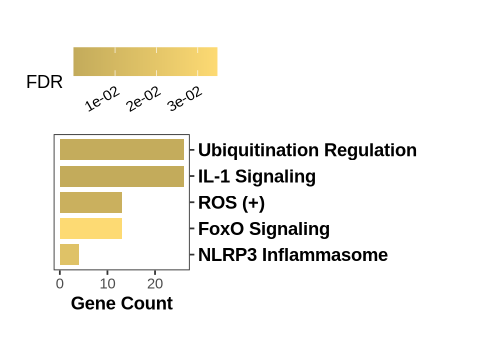

In [6]:
options(repr.plot.width = 4, repr.plot.height = 3)
g1 <-  ggplot(ilc1, aes(x = reorder(term.description, gene_count), y = gene_count, fill = FDR)) +
             geom_bar(stat = "identity", position = "dodge", width = bar_width) + 
             scale_fill_gradient(high = '#fdda73', low = '#C3AB5B', labels = label_scientific(digits = 3)) + 
             theme_test() + common_theme + coord_flip() + ylab('Gene Count') + xlab(NULL) +
             scale_y_continuous(position = "left", labels = abs) + scale_x_discrete(position = "top") 
g1

### Figure 4G. ILC2 Barplot 

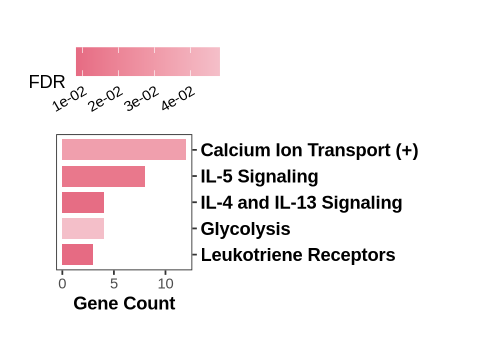

In [7]:
options(repr.plot.width = 4, repr.plot.height = 3)
g2 <-  ggplot(ilc2, aes(x = reorder(term.description, gene_count), y = gene_count, fill = FDR)) +
             geom_bar(stat = "identity", position = "dodge", width = bar_width) + 
             scale_fill_gradient(high = '#F4BFC9', low = '#E66B83', labels = label_scientific(digits = 3)) + 
             theme_test() + common_theme + coord_flip() + ylab('Gene Count') + xlab(NULL) +
             scale_y_continuous(position = "left", labels = abs, breaks = seq(0, max(ilc2$gene_count), by = 5)) + scale_x_discrete(position = "top") 
g2

### Figure 4H. ILC3 Barplot

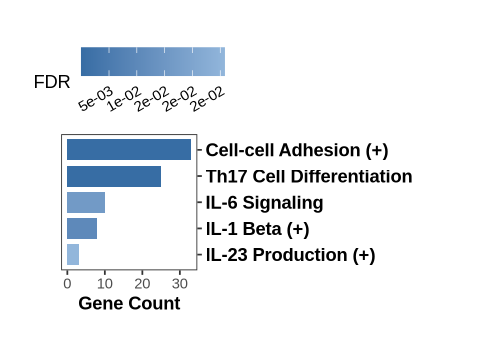

In [8]:
options(repr.plot.width = 4, repr.plot.height = 3)
g3 <-  ggplot(ilc3, aes(x = reorder(term.description, gene_count), y = gene_count, fill = FDR)) +
             geom_bar(stat = "identity", position = "dodge", width = bar_width) + 
             scale_fill_gradient(high = '#92B6DB', low = '#376DA4', labels = label_scientific(digits = 1)) +              
             theme_test() + common_theme + coord_flip() + ylab('Gene Count') + xlab(NULL) +
             scale_y_continuous(position = "left", labels = abs) + scale_x_discrete(position = "top") 
g3

### Figure 4I. ILC1 Dotplot

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


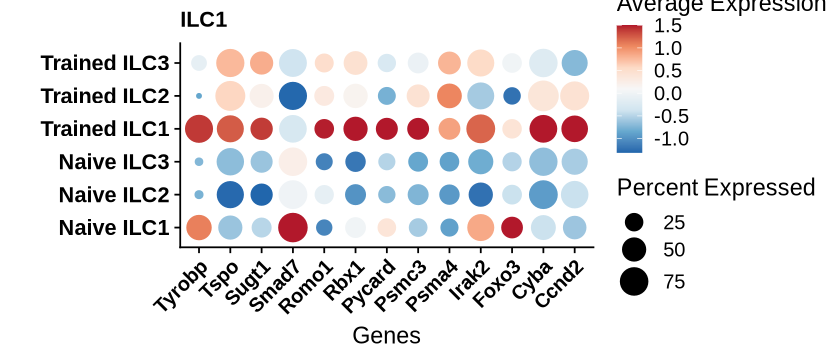

In [9]:
options(repr.plot.width = 7, repr.plot.height = 3)

DefaultAssay(dat) <- "RNA"
Idents(dat) <- dat@meta.data$sample
genes2plot <- c('Smad7',"Foxo3",'Tspo','Rbx1',"Cyba", "Romo1","Tyrobp","Ccnd2", "Irak2","Psma4","Psmc3","Pycard","Sugt1") %>% sort %>% rev
DotPlot(object = dat, features = genes2plot, cols="RdBu", col.max = 1.5, col.min = -1.5) + scale_size(range = c(1, 8)) +
scale_y_discrete(labels = c(
    "mILC1_control" = "Naive ILC1", 
    "mILC1_treatment" = "Trained ILC1", 
    "mILC2_control" = "Naive ILC2", 
    "mILC2_treatment" = "Trained ILC2",  
    "mILC3_control" = "Naive ILC3", 
    "mILC3_treatment" = "Trained ILC3")) + 
theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, face = "bold"), 
    axis.text.y = element_text(face = "bold", size = 13),
    legend.position = "right", 
    legend.box = "vertical",
    plot.title = element_text(size = 13)) +
labs(x = "Genes", y = "", title = 'ILC1') 

### Figure 4J. ILC2 Dotplot

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


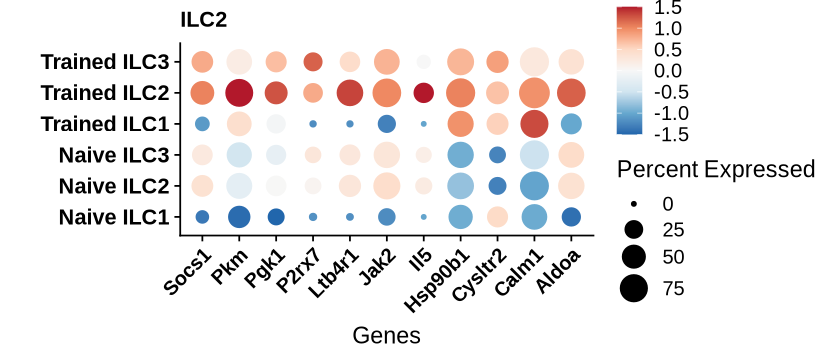

In [10]:
options(repr.plot.width = 7, repr.plot.height = 3)

DefaultAssay(dat) <- "RNA"
Idents(dat) <- dat@meta.data$sample
genes2plot <- c('Calm1','P2rx7','Hsp90b1','Jak2','Socs1','Il5','Pkm', 'Pgk1', 'Aldoa', 'Ltb4r1', 'Cysltr2') %>% sort %>% rev
DotPlot(object = dat, features = genes2plot, cols="RdBu", col.max = 1.5, col.min = -1.5) + scale_size(range = c(1, 8)) +
scale_y_discrete(labels = c(
    "mILC1_control" = "Naive ILC1", 
    "mILC1_treatment" = "Trained ILC1", 
    "mILC2_control" = "Naive ILC2", 
    "mILC2_treatment" = "Trained ILC2",  
    "mILC3_control" = "Naive ILC3", 
    "mILC3_treatment" = "Trained ILC3")) + 
theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, face = "bold"), 
    axis.text.y = element_text(face = "bold", size = 13),
    legend.position = "right", 
    legend.box = "vertical",
    plot.title = element_text(size = 13)) +
labs(x = "Genes", y = "", title = 'ILC2') 

### Figure 4k. ILC3 Dotplot

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


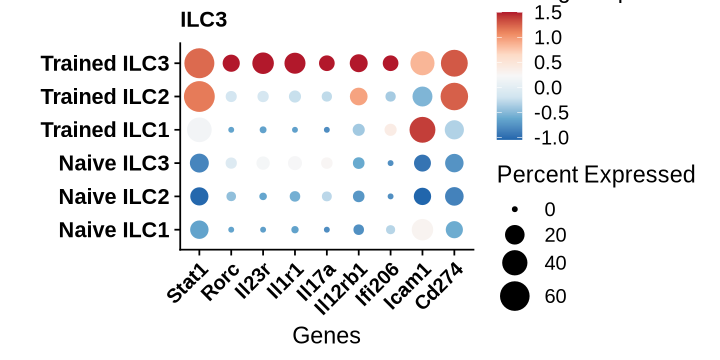

In [11]:
options(repr.plot.width = 6, repr.plot.height = 3)

DefaultAssay(dat) <- "RNA"
Idents(dat) <- dat@meta.data$sample
genes2plot <- c('Icam1','Il12rb1','Cd274', 'Ifi206', 'Il17a', 'Stat1','Il23r','Rorc','Il1r1') %>% sort %>% rev
DotPlot(object = dat, features = genes2plot, cols="RdBu", col.max = 1.5, col.min = -1.5) + scale_size(range = c(1, 8)) +
scale_y_discrete(labels = c(
    "mILC1_control" = "Naive ILC1", 
    "mILC1_treatment" = "Trained ILC1", 
    "mILC2_control" = "Naive ILC2", 
    "mILC2_treatment" = "Trained ILC2",  
    "mILC3_control" = "Naive ILC3", 
    "mILC3_treatment" = "Trained ILC3")) + 
theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, face = "bold"), 
    axis.text.y = element_text(face = "bold", size = 13),
    legend.position = "right", 
    legend.box = "vertical",
    plot.title = element_text(size = 13)) +
labs(x = "Genes", y = "", title = 'ILC3') 